This study helps to classify obesity levels.

Data Set Information:

This dataset include data for the estimation of obesity levels in individuals based on their eating habits and physical condition. The data contains 17 attributes and 2111 records, the records are labeled with the class variable NObesity (Obesity Level), that allows classification of the data using the values of Insufficient Weight, Normal Weight, Overweight Level I, Overweight Level II, Obesity Type I, Obesity Type II and Obesity Type III.

In [30]:
#import the google drive on colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Install Dataprep

In [2]:
!pip install dataprep

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 27.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.5/18.5 MB 74.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.6/133.6 kB 19.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 95.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 84.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 56.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 56.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 69.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 764.0/764.0 kB 56.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 36.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

Import python libraries

In [3]:
import numpy as np #import the numpy library
import pandas as pd # import the pandas library
import seaborn as sns # import the seabon visualization tool
from sklearn.model_selection import train_test_split, GridSearchCV # import dataset splitter and GridSearchCV
# Import necessary modules from dataprep
from dataprep.eda import plot, plot_correlation, plot_missing
from dataprep.eda import create_report
#import classification Model metrics
from sklearn.metrics import accuracy_score, precision_score, f1_score, classification_report, roc_auc_score, roc_curve, RocCurveDisplay
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import label_binarize

In [31]:
#load the loan dataset
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Segun PGD/Dataset/obesityset.csv')
#to set maximum row
pd.set_option('display.max_rows',None)
#to set maximum column
pd.set_option('display.max_columns', None)
df = pd.DataFrame(dataset)
#To check the first 5 rows of the dataset
df.head(10)


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II
5,Male,29.0,1.62,53.0,no,yes,2.0,3.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Automobile,Normal_Weight
6,Female,23.0,1.50,55.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,0.0,Sometimes,Motorbike,Normal_Weight
7,Male,22.0,1.64,53.0,no,no,2.0,3.0,Sometimes,no,2.0,no,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
8,Male,24.0,1.78,64.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,1.0,Frequently,Public_Transportation,Normal_Weight
9,Male,22.0,1.72,68.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,1.0,1.0,no,Public_Transportation,Normal_Weight


In [5]:
df['NObeyesdad'].unique()

array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'], dtype=object)

In [6]:
df.shape

(2111, 17)

In [7]:
# Use dataprep to visualize the data
plot(df)


Output hidden; open in https://colab.research.google.com to view.

In [8]:
plot_correlation(df)

Output hidden; open in https://colab.research.google.com to view.

In [9]:
plot_missing(df)

Output hidden; open in https://colab.research.google.com to view.

In [10]:
# Generate an EDA report
report = create_report(df)
report.show()

Output hidden; open in https://colab.research.google.com to view.

DATA PREPROCESSING BEGINS...

In [11]:
#we need identify the rows with null values as NaN
df.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

From the above output, there is no existing null values in the dataset rows. This can be evident by plotting the weight and the height values in a boxenplot.

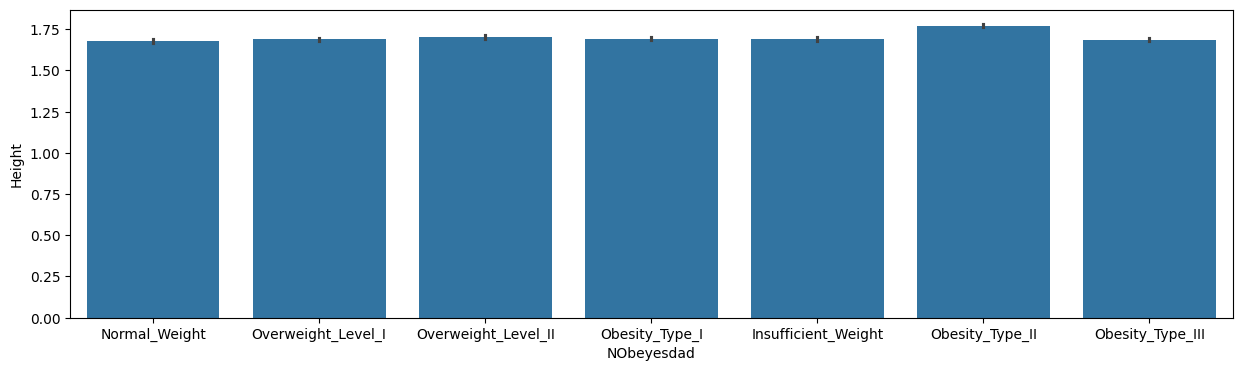

In [12]:
#Plot the NObeyesdad and height columns
plt.figure(figsize=(15,4))
sns.barplot(x= 'NObeyesdad', y = 'Height', data = df, orient = 'vertical')
plt.show()

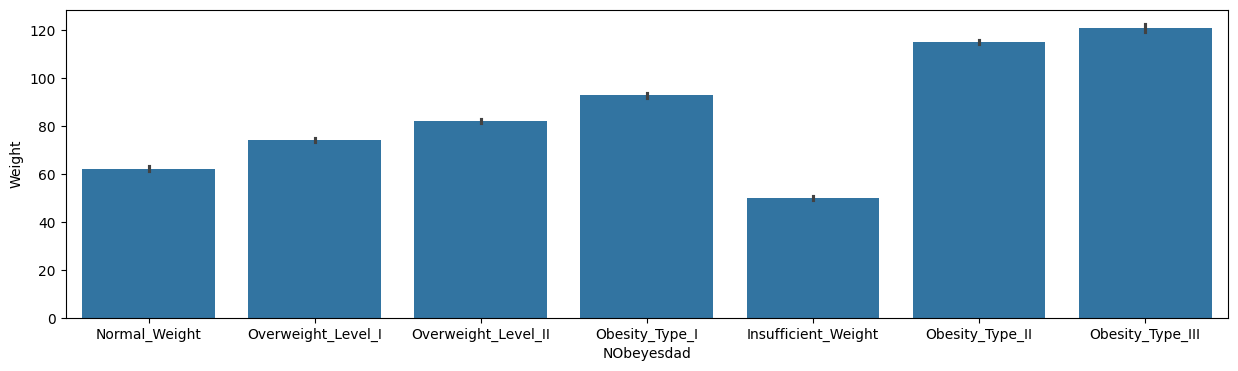

In [13]:
#Plot the NObeyesdad and weight columns
plt.figure(figsize=(15,4))
sns.barplot(x= 'NObeyesdad', y = 'Weight', data = df, orient = 'vertical')
plt.show()

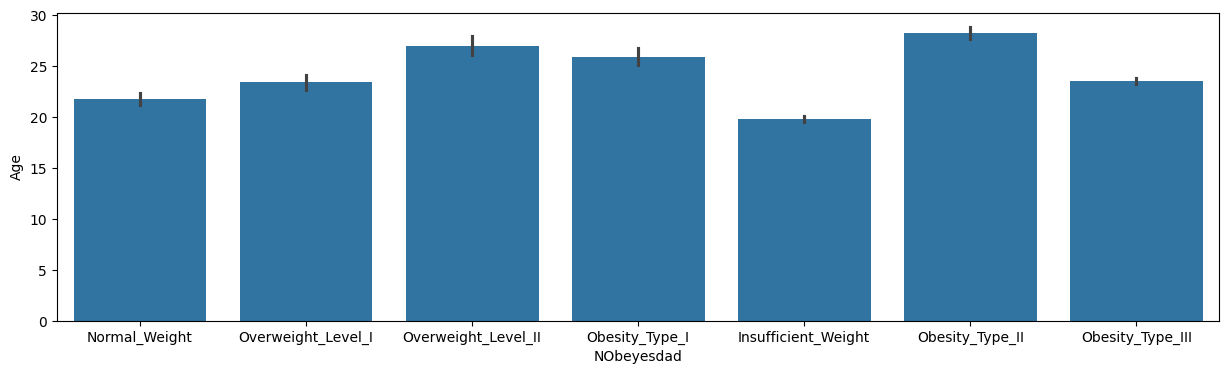

In [14]:
#Plot the NObeyesdad and Age columns
plt.figure(figsize=(15,4))
sns.barplot(x='NObeyesdad', y ='Age', data = df, orient = 'vertical')
plt.show()

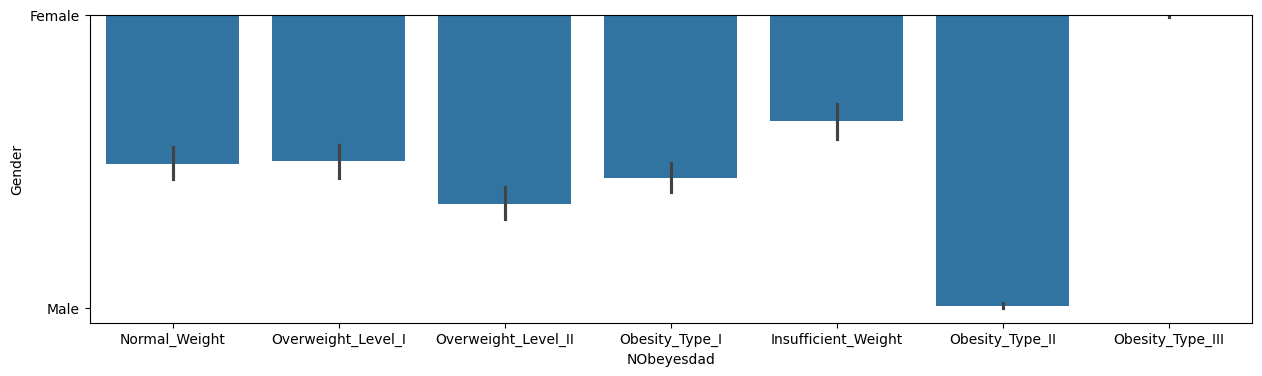

In [15]:
#Plot the NObeyesdad and Gender columns
plt.figure(figsize=(15,4))
sns.barplot(x='NObeyesdad', y = 'Gender', data = df, orient = 'vertical')
plt.show()

The output figure indicates that there is no outlier in the dataset values, but there is need to label the categorical columns for easy model training.

In [16]:
#Categorical columns transformation
df['Gender'] = df['Gender'].map({'Male': 1, 'Female':0})
df['family_history_with_overweight'] = df['family_history_with_overweight'].map({'yes': 1, 'no':0})
df['FAVC'] = df['FAVC'].map({'yes': 1, 'no':0})
df['CAEC'] = df['CAEC'].map({'Frequently': 3, 'Always':2, 'Sometimes':1, 'no':0})
df['SMOKE'] = df['SMOKE'].map({'yes': 1, 'no':0})
df['SCC'] = df['SCC'].map({'yes': 1, 'no':0})
df['CALC'] = df['CALC'].map({'Frequently': 3, 'Always':2, 'Sometimes':1, 'no':0})
df['MTRANS'] = df['MTRANS'].map({'Automobile':4, 'Bike':3, 'Motorbike':2, 'Public_Transportation':1,'Walking':0})
df['NObeyesdad'] = df['NObeyesdad'].map({'Obesity_Type_III':6, 'Obesity_Type_II':5, 'Obesity_Type_I':4,'Overweight_Level_II':3,
                                         'Overweight_Level_I':2, 'Normal_Weight':1,'Insufficient_Weight':0})

In [17]:
#Let's view the transformed dataset
df.head(20)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,21.0,1.62,64.0,1,0,2.0,3.0,1,0,2.0,0,0.0,1.0,0,1,1
1,0,21.0,1.52,56.0,1,0,3.0,3.0,1,1,3.0,1,3.0,0.0,1,1,1
2,1,23.0,1.80,77.0,1,0,2.0,3.0,1,0,2.0,0,2.0,1.0,3,1,1
3,1,27.0,1.80,87.0,0,0,3.0,3.0,1,0,2.0,0,2.0,0.0,3,0,2
4,1,22.0,1.78,89.8,0,0,2.0,1.0,1,0,2.0,0,0.0,0.0,1,1,3
5,1,29.0,1.62,53.0,0,1,2.0,3.0,1,0,2.0,0,0.0,0.0,1,4,1
6,0,23.0,1.50,55.0,1,1,3.0,3.0,1,0,2.0,0,1.0,0.0,1,2,1
7,1,22.0,1.64,53.0,0,0,2.0,3.0,1,0,2.0,0,3.0,0.0,1,1,1
8,1,24.0,1.78,64.0,1,1,3.0,3.0,1,0,2.0,0,1.0,1.0,3,1,1
9,1,22.0,1.72,68.0,1,1,2.0,3.0,1,0,2.0,0,1.0,1.0,0,1,1


After the categorical column labeling, it was discovered that some of the discrete varibles presented a default floating values (e.g Age). There is need to convert these variables to integer.

In [18]:
#convert the integer columns from the default float to integer
df = df.astype({"Age":"int",
                "family_history_with_overweight":"int",
                "FAVC":"int",
                "FCVC":"int",
                "NCP":"int",
                "CAEC":"int",
                "SMOKE":"int",
                "CH2O":"int",
                "SCC":"int",
                "FAF":"int",
                "TUE":"int",
                "CALC":"int",
                "MTRANS":"int",
                "NObeyesdad":"int"
                })

In [19]:
#view converted dataframe
df.head(30)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,21,1.62,64.0,1,0,2,3,1,0,2,0,0,1,0,1,1
1,0,21,1.52,56.0,1,0,3,3,1,1,3,1,3,0,1,1,1
2,1,23,1.80,77.0,1,0,2,3,1,0,2,0,2,1,3,1,1
3,1,27,1.80,87.0,0,0,3,3,1,0,2,0,2,0,3,0,2
4,1,22,1.78,89.8,0,0,2,1,1,0,2,0,0,0,1,1,3
5,1,29,1.62,53.0,0,1,2,3,1,0,2,0,0,0,1,4,1
6,0,23,1.50,55.0,1,1,3,3,1,0,2,0,1,0,1,2,1
7,1,22,1.64,53.0,0,0,2,3,1,0,2,0,3,0,1,1,1
8,1,24,1.78,64.0,1,1,3,3,1,0,2,0,1,1,3,1,1
9,1,22,1.72,68.0,1,1,2,3,1,0,2,0,1,1,0,1,1


After data cleaning and prepropressing, it is advisable that we have our preprocessed data saved in csv format for the model training.

In [20]:
#Save the preprocessed data to a .csv file
#df.to_csv('/content/drive/MyDrive/Colab Notebooks/Segun PGD/Dataset/pre-processed_diabetes_dataset.csv', index=False )

You can start running this code from this current cell as the preprocessed data is being reloaded from this point.

In [21]:
#Import statements
import numpy as np #import the numpy library
import pandas as pd # import the pandas library
import seaborn as sns # import the seabon visualization tool
from sklearn.model_selection import train_test_split # import dataset splitter
#importing the SVM algorithm from the sklearn library
from sklearn import svm
#import classification Model metrics
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

#Load preprocessed data
preprocessed_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Segun PGD/Dataset/pre-processed_diabetes_dataset.csv')
#to set maximum row
pd.set_option('display.max_rows',None)
#to set maximum column
pd.set_option('display.max_columns', None)
df  = pd.DataFrame(preprocessed_data)
df.head(30)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,21,1.62,64.0,1,0,2,3,1,0,2,0,0,1,0,1,1
1,0,21,1.52,56.0,1,0,3,3,1,1,3,1,3,0,1,1,1
2,1,23,1.80,77.0,1,0,2,3,1,0,2,0,2,1,3,1,1
3,1,27,1.80,87.0,0,0,3,3,1,0,2,0,2,0,3,0,2
4,1,22,1.78,89.8,0,0,2,1,1,0,2,0,0,0,1,1,3
5,1,29,1.62,53.0,0,1,2,3,1,0,2,0,0,0,1,4,1
6,0,23,1.50,55.0,1,1,3,3,1,0,2,0,1,0,1,2,1
7,1,22,1.64,53.0,0,0,2,3,1,0,2,0,3,0,1,1,1
8,1,24,1.78,64.0,1,1,3,3,1,0,2,0,1,1,3,1,1
9,1,22,1.72,68.0,1,1,2,3,1,0,2,0,1,1,0,1,1


The dataset has been preprocessed.
We will need to split the dataset into independent variable 'x' and dependent varible 'y', the value we want to predict and classify.

In [22]:
df.head(3)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,21,1.62,64.0,1,0,2,3,1,0,2,0,0,1,0,1,1
1,0,21,1.52,56.0,1,0,3,3,1,1,3,1,3,0,1,1,1
2,1,23,1.80,77.0,1,0,2,3,1,0,2,0,2,1,3,1,1


In [23]:
df['NObeyesdad'].unique()

array([1, 2, 3, 4, 0, 5, 6])

In [24]:
df['Gender'].unique()

array([0, 1])

In [25]:
# set the x variable values by dropping columns that are not necessary in x.
X = df.drop(columns = ['NObeyesdad'], axis=1)
y = df['NObeyesdad']

The dataset needs to be splitted and set for the model training

We will split the dataset into 90% trainset and 10% testset.

In [26]:
#Data split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1, stratify=y, random_state=42)

RANDOM FOREST CLASSIFIER (RF-CLASSIFIER)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Accuracy:  0.9339622641509434
Precision:  0.9368938724775988
Recall:  0.9339622641509434
F1-score:  0.9347438650395555
ROC AUC Score:  0.9615023415877471


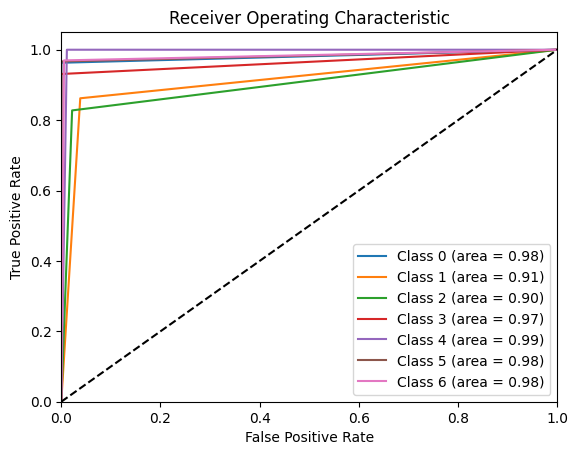

In [27]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load dataset (assuming it's in CSV format and already downloaded)
# Replace 'your_dataset.csv' with the path to your dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Segun PGD/Dataset/pre-processed_diabetes_dataset.csv')

# Assuming the last column is the target and the first 16 columns are features
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Identify categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numeric_cols = X.select_dtypes(exclude=['object']).columns

# Set up the column transformer with one-hot encoding for categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numeric_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])

# Create a pipeline that includes preprocessing and the Random Forest classifier
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Set up the parameter grid for GridSearchCV
param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [10, 20, 30, None],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__bootstrap': [True, False]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid,
                           cv=5, n_jobs=-1, scoring='accuracy', verbose=2)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best parameters
best_model = grid_search.best_estimator_

# Predictions on the test set
y_pred = best_model.predict(X_test)

# Print evaluation metrics
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred, average='weighted'))
print("Recall: ", recall_score(y_test, y_pred, average='weighted'))
print("F1-score: ", f1_score(y_test, y_pred, average='weighted'))

# Binarize the output labels for ROC AUC
y_test_binarized = label_binarize(y_test, classes=np.unique(y))
y_pred_binarized = label_binarize(y_pred, classes=np.unique(y))

# Compute ROC AUC score for each class
roc_auc = roc_auc_score(y_test_binarized, y_pred_binarized, average='weighted')
print("ROC AUC Score: ", roc_auc)

# Plot ROC curve for each class
fpr = {}
tpr = {}
roc_auc = {}

for i in range(len(np.unique(y))):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_binarized[:, i])
    roc_auc[i] = roc_auc_score(y_test_binarized[:, i], y_pred_binarized[:, i])

# Plot all ROC curves
plt.figure()
for i in range(len(np.unique(y))):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

Extreme Gradient Boosting CLASSIFIER (XGBoost-CLASSIFIER)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Accuracy:  0.9575471698113207
Precision:  0.9582990101858025
Recall:  0.9575471698113207
F1-score:  0.9573184832259025
ROC AUC Score:  0.9752541371602221


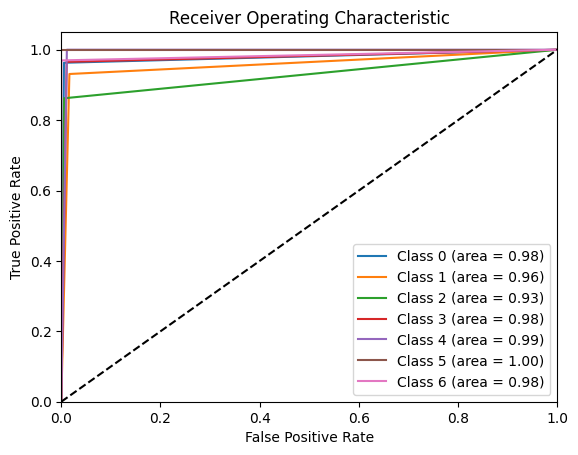

In [28]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier

# Load dataset (assuming it's in CSV format and already downloaded)
# Replace 'your_dataset.csv' with the path to your dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Segun PGD/Dataset/pre-processed_diabetes_dataset.csv')

# Assuming the last column is the target and the first 16 columns are features
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Identify categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numeric_cols = X.select_dtypes(exclude=['object']).columns

# Set up the column transformer with one-hot encoding for categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numeric_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])

# Create a pipeline that includes preprocessing and the XGBoost classifier
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42))
])

# Set up the parameter grid for GridSearchCV
param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [3, 6, 9],
    'classifier__learning_rate': [0.01, 0.1, 0.2],
    'classifier__subsample': [0.7, 0.8, 0.9],
    'classifier__colsample_bytree': [0.7, 0.8, 0.9]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid,
                           cv=5, n_jobs=-1, scoring='accuracy', verbose=2)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best parameters
best_model = grid_search.best_estimator_

# Predictions on the test set
y_pred = best_model.predict(X_test)

# Print evaluation metrics
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred, average='weighted'))
print("Recall: ", recall_score(y_test, y_pred, average='weighted'))
print("F1-score: ", f1_score(y_test, y_pred, average='weighted'))

# Binarize the output labels for ROC AUC
y_test_binarized = label_binarize(y_test, classes=np.unique(y))
y_pred_binarized = label_binarize(y_pred, classes=np.unique(y))

# Compute ROC AUC score for each class
roc_auc = roc_auc_score(y_test_binarized, y_pred_binarized, average='weighted')
print("ROC AUC Score: ", roc_auc)

# Plot ROC curve for each class
fpr = {}
tpr = {}
roc_auc = {}

for i in range(len(np.unique(y))):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_binarized[:, i])
    roc_auc[i] = roc_auc_score(y_test_binarized[:, i], y_pred_binarized[:, i])

# Plot all ROC curves
plt.figure()
for i in range(len(np.unique(y))):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


**ExtraTreesClassifier**

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Accuracy:  0.9211356466876972
Precision:  0.9255139030541655
Recall:  0.9211356466876972
F1-score:  0.9226779304770185
ROC AUC Score:  0.9542287724607574


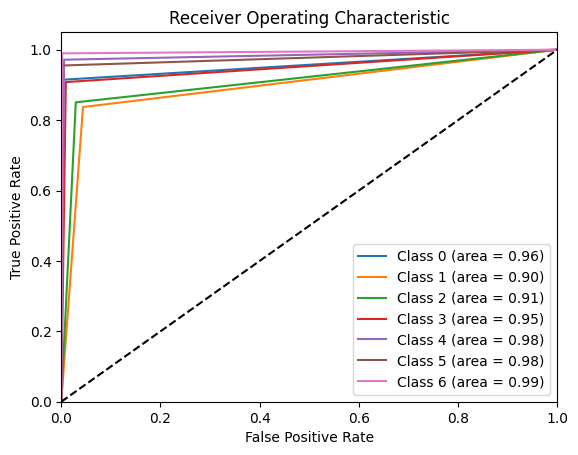

In [29]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import ExtraTreesClassifier

# Load dataset (assuming it's in CSV format and already downloaded)
# Replace 'your_dataset.csv' with the path to your dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Segun PGD/Dataset/pre-processed_diabetes_dataset.csv')

# Assuming the last column is the target and the first 16 columns are features
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Identify categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numeric_cols = X.select_dtypes(exclude=['object']).columns

# Set up the column transformer with one-hot encoding for categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numeric_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])

# Create a pipeline that includes preprocessing and the Extra Trees classifier
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', ExtraTreesClassifier(random_state=42))
])

# Set up the parameter grid for GridSearchCV
param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [10, 20, 30, None],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__bootstrap': [True, False]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid,
                           cv=5, n_jobs=-1, scoring='accuracy', verbose=2)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best parameters
best_model = grid_search.best_estimator_

# Predictions on the test set
y_pred = best_model.predict(X_test)

# Print evaluation metrics
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred, average='weighted'))
print("Recall: ", recall_score(y_test, y_pred, average='weighted'))
print("F1-score: ", f1_score(y_test, y_pred, average='weighted'))

# Binarize the output labels for ROC AUC
y_test_binarized = label_binarize(y_test, classes=np.unique(y))
y_pred_binarized = label_binarize(y_pred, classes=np.unique(y))

# Compute ROC AUC score for each class
roc_auc = roc_auc_score(y_test_binarized, y_pred_binarized, average='weighted')
print("ROC AUC Score: ", roc_auc)

# Plot ROC curve for each class
fpr = {}
tpr = {}
roc_auc = {}

for i in range(len(np.unique(y))):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_binarized[:, i])
    roc_auc[i] = roc_auc_score(y_test_binarized[:, i], y_pred_binarized[:, i])

# Plot all ROC curves
plt.figure()
for i in range(len(np.unique(y))):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


Evaluate the Model Using the Accuracy Curve

MODEL PREDICTION

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Accuracy:  0.9558359621451105
Precision:  0.9565830280527909
Recall:  0.9558359621451105
F1-score:  0.9558389124614716

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.96        82
           1       0.90      0.93      0.91        86
           2       0.94      0.90      0.92        87
           3       0.96      0.94      0.95        87
           4       0.94      1.00      0.97       106
           5       1.00      0.96      0.98        89
           6       1.00      0.99      0.99        97

    accuracy                           0.96       634
   macro avg       0.96      0.95      0.95       634
weighted avg       0.96      0.96      0.96       634


Confusion Matrix:
 [[ 79   3   0   0   0   0   0]
 [  4  80   2   0   0   0   0]
 [  0   6  78   3   0   0   0]
 [  0   0   3  82   2   0   0]
 [  0   0   0   0 106   0   0]
 [  0   0   0   0   

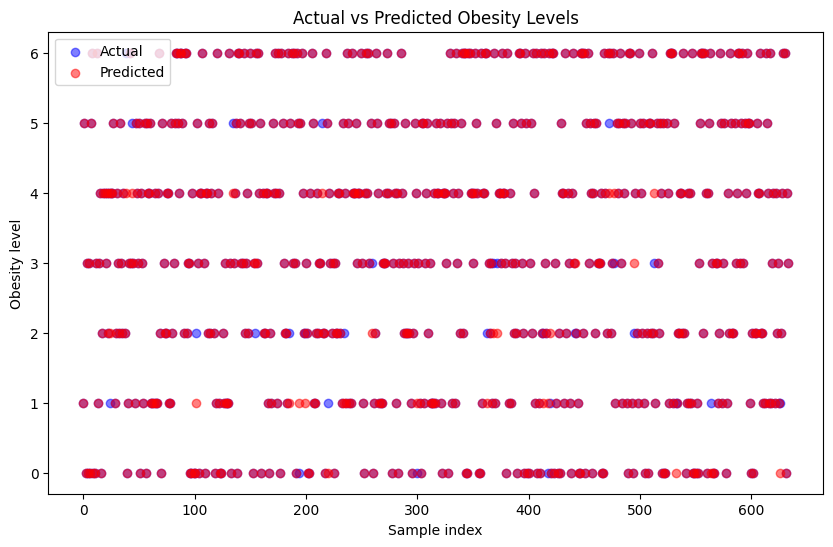

ROC AUC Score:  0.9742237306237004


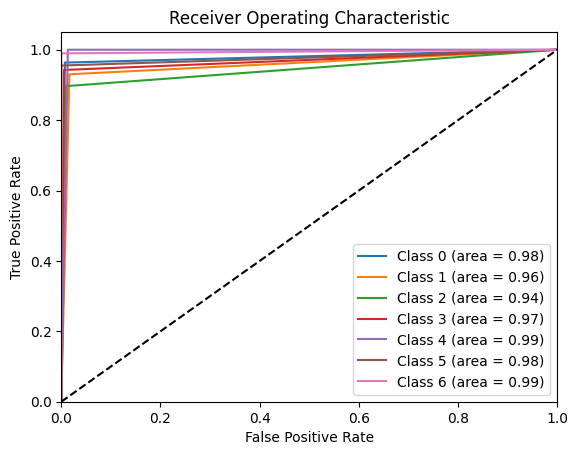

In [32]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier

# Load dataset (assuming it's in CSV format and already downloaded)
# Replace 'your_dataset.csv' with the path to your dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Segun PGD/Dataset/pre-processed_diabetes_dataset.csv')

# Assuming the last column is the target and the first 16 columns are features
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Identify categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numeric_cols = X.select_dtypes(exclude=['object']).columns

# Assuming the last column is the target and the first 16 columns are features
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Identify categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numeric_cols = X.select_dtypes(exclude=['object']).columns

# Set up the column transformer with one-hot encoding for categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numeric_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])

# Create a pipeline that includes preprocessing and the XGBoost classifier
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42))
])

# Set up the parameter grid for GridSearchCV
param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [3, 6, 9],
    'classifier__learning_rate': [0.01, 0.1, 0.2],
    'classifier__subsample': [0.7, 0.8, 0.9],
    'classifier__colsample_bytree': [0.7, 0.8, 0.9]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid,
                           cv=5, n_jobs=-1, scoring='accuracy', verbose=2)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best parameters
best_model = grid_search.best_estimator_

# Predictions on the test set
y_pred = best_model.predict(X_test)

# Print evaluation metrics
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred, average='weighted'))
print("Recall: ", recall_score(y_test, y_pred, average='weighted'))
print("F1-score: ", f1_score(y_test, y_pred, average='weighted'))

# Print classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Print confusion matrix
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Plot the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', alpha=0.5, label='Actual')
plt.scatter(range(len(y_pred)), y_pred, color='red', alpha=0.5, label='Predicted')
plt.xlabel('Sample index')
plt.ylabel('Obesity level')
plt.title('Actual vs Predicted Obesity Levels')
plt.legend()
plt.show()

# Binarize the output labels for ROC AUC
y_test_binarized = label_binarize(y_test, classes=np.unique(y))
y_pred_binarized = label_binarize(y_pred, classes=np.unique(y))

# Compute ROC AUC score for each class
roc_auc = roc_auc_score(y_test_binarized, y_pred_binarized, average='weighted')
print("ROC AUC Score: ", roc_auc)

# Plot ROC curve for each class
fpr = {}
tpr = {}
roc_auc = {}

for i in range(len(np.unique(y))):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_binarized[:, i])
    roc_auc[i] = roc_auc_score(y_test_binarized[:, i], y_pred_binarized[:, i])

# Plot all ROC curves
plt.figure()
for i in range(len(np.unique(y))):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from xgboost import XGBClassifier

# Load dataset (assuming it's in CSV format and already downloaded)
# Replace 'your_dataset.csv' with the path to your dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Segun PGD/Dataset/pre-processed_diabetes_dataset.csv')

# Assuming the last column is the target and the first 16 columns are features
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Initialize the XGBoost classifier
model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

# Fit the model
model.fit(X_train, y_train)

# Predictions on the test set
y_pred = model.predict(X_test)

# Print the predicted and actual values
print("Predicted values: ", y_pred)
print("Actual values: ", y_test.values)

# Print evaluation metrics
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Predicted values:  [1 5 0 3 0 3 0 5 6 0 0 3 6 1 3 4 0 2 4 4 3 4 2 4 2 4 4 5 1 2 4 3 2 5 3 2 4
 2 4 0 1 3 6 3 4 3 1 5 4 3 5 0 4 3 1 5 0 5 4 4 5 1 1 1 4 1 1 4 6 2 0 5 3 2
 2 4 4 1 1 5 2 3 5 6 6 5 4 6 6 5 2 6 6 2 3 3 0 0 4 0 0 2 5 3 0 4 4 6 3 0 4
 4 2 5 2 4 5 2 0 1 6 4 1 0 0 2 1 3 1 1 1 6 3 0 6 3 4 5 0 6 6 5 3 3 6 2 3 4
 2 5 6 5 0 3 2 6 4 6 4 5 0 4 2 2 4 4 1 0 2 1 5 4 6 4 1 6 4 0 6 5 3 2 2 1 6
 1 5 6 3 6 3 1 6 5 1 5 6 4 2 1 3 2 0 0 4 6 5 1 1 2 4 2 4 3 5 2 2 0 6 5 0 4
 3 2 3 0 3 2 2 4 4 2 1 5 1 4 1 6 5 1 1 6 4 4 4 5 3 4 4 6 3 1 0 4 6 4 6 3 5
 2 0 1 2 6 5 4 1 1 1 3 3 3 4 6 4 5 5 0 3 5 4 1 4 0 3 6 4 3 2 5 2 2 3 2 1 0
 2 3 5 4 1 3 1 0 5 5 1 3 4 5 2 3 0 1 1 4 1 5 4 4 5 1 0 4 4 4 3 5 0 6 5 1 4
 5 1 6 3 4 2 5 6 2 6 6 0 0 6 6 4 4 3 4 6 5 4 0 0 6 1 4 4 6 6 1 3 2 3 1 2 6
 1 5 2 4 4 3 6 4 4 3 0 6 1 4 1 3 5 2 3 2 0 6 6 5 3 2 0 6 5 0 0 3 5 2 6 4 1
 6 0 1 0 6 2 1 6 3 2 1 6 2 0 6 6 0 3 1 0 2 0 5 4 4 1 6 2 4 3 1 0 4 6 3 3 2
 1 0 0 6 6 2 6 0 5 6 3 5 4 0 4 5 2 5 3 3 3 4 0 0 6 4 2 6 4 6 2 3 6 4 1 5 4
 5 6 3

In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from xgboost import XGBClassifier

# Load dataset (assuming it's in CSV format and already downloaded)
# Replace 'your_dataset.csv' with the path to your dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Segun PGD/Dataset/pre-processed_diabetes_dataset.csv')

# Assuming the last column is the target and the first 16 columns are features
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Initialize the XGBoost classifier
model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

# Fit the model
model.fit(X_train, y_train)

# Predictions on the test set
y_pred = model.predict(X_test)

# Create a DataFrame to display the first 20 actual and predicted values
results_df = pd.DataFrame({'Actual': y_test.values[:20], 'Predicted': y_pred[:20]})

# Print the table
print(results_df)

# Print evaluation metrics
print("\nAccuracy: ", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


    Actual  Predicted
0        1          1
1        5          5
2        0          0
3        3          3
4        0          0
5        3          3
6        0          0
7        5          5
8        6          6
9        0          0
10       0          0
11       3          3
12       6          6
13       1          1
14       3          3
15       4          4
16       0          0
17       2          2
18       4          4
19       4          4

Accuracy:  0.9542586750788643

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95        82
           1       0.90      0.92      0.91        86
           2       0.93      0.92      0.92        87
           3       0.98      0.92      0.95        87
           4       0.94      1.00      0.97       106
           5       1.00      0.97      0.98        89
           6       0.99      0.99      0.99        97

    accuracy                           0.95     

Save the model

In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from xgboost import XGBClassifier
import joblib

# Load dataset (assuming it's in CSV format and already downloaded)
# Replace 'your_dataset.csv' with the path to your dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Segun PGD/Dataset/pre-processed_diabetes_dataset.csv')

# Assuming the last column is the target and the first 16 columns are features
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Initialize the XGBoost classifier
model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

# Fit the model
model.fit(X_train, y_train)

# Save the model
joblib.dump(model, '/content/drive/MyDrive/Colab Notebooks/Segun PGD/xgboost_model.pkl')

# Predictions on the test set
y_pred = model.predict(X_test)

# Create a DataFrame to display the first 20 actual and predicted values
results_df = pd.DataFrame({'Actual': y_test.values[:20], 'Predicted': y_pred[:20]})

# Print the table
print(results_df)

# Print evaluation metrics
print("\nAccuracy: ", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


    Actual  Predicted
0        1          1
1        5          5
2        0          0
3        3          3
4        0          0
5        3          3
6        0          0
7        5          5
8        6          6
9        0          0
10       0          0
11       3          3
12       6          6
13       1          1
14       3          3
15       4          4
16       0          0
17       2          2
18       4          4
19       4          4

Accuracy:  0.9542586750788643

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95        82
           1       0.90      0.92      0.91        86
           2       0.93      0.92      0.92        87
           3       0.98      0.92      0.95        87
           4       0.94      1.00      0.97       106
           5       1.00      0.97      0.98        89
           6       0.99      0.99      0.99        97

    accuracy                           0.95     